# Basic concepts of plotting
* How to use matplotlib
* usage of axes and saving
* multiple plots in one

## How to plot

one of the most popular librarie for plotting in python is matplotlib

In [34]:
import matplotlib.pyplot as plt

# needed only in jupyter and this session ---
# please ignore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

lets generate some variables to be plotted


In [6]:
import numpy as np

# plotting limits and stepping (try np.pi)
start = 0
end = 10
steps = 100

# create linear space in x and sin in y
x = np.linspace(start,end,steps)
y = np.sin(x)

we imported the plotting library as `plt` so for a straight forward plotting we will call its plot method:


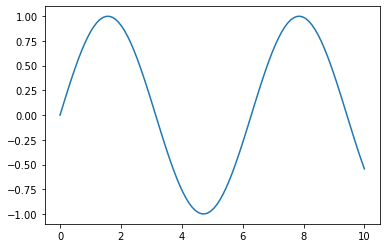

In [7]:
# plot y vs x
plt.plot(x,y)

# show the plot
plt.show()

__note__: 
- generally the horizontal axis comes before the vertical one
- the `show()` method is not always needed, but is reccomended to include it always

## Using axes and the figure instance

- it is advisable to generate the plot object in advance and to address the so-called *axes*
- the axes (stored below in the variable `ax`) also have a plot method that can be called

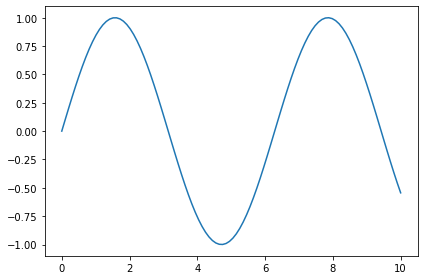

In [35]:
# generate plotting instance with axes
fig, ax = plt.subplots(1,1, tight_layout=True)

ax.plot(x,y)

fig.show()

now the figure has to variables `fig` and `ax` with which we can adress the figure and the axes, respectively.

### more axes methods

with with `ax` we can now modify plenty values of the figure as, e.g. the labels, the ticks, the lmits and so on...

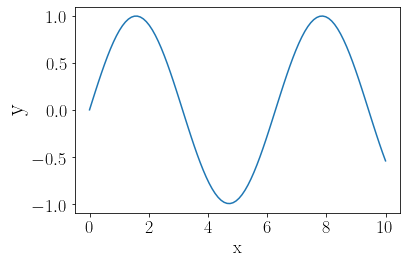

In [42]:
# y1 = np.cos(x)

fig, ax = plt.subplots(1,1, tight_layout=True)

ax.plot(x,y)
# ax.plot(x, y1, label="cos")

ax.set_xlabel("x")
ax.set_ylabel("y", size=24)

# set the limits of the x axis
# ax.set_xlim((-2, 2))

# set custom ticks on the y axis
# ax.set_yticks([-0.3, 0, 0.5])

# ax.legend()

fig.show()

### fontsize and Latex embedding globally
since it can be annoying to write down the specification of the fontsize for every label or tick that is created it is a good practice to set these generally at the __beginning__ of a session

In [41]:
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'DejaVu Sans','size': 18})

once we did run these commands the fontsizes, the font family and Latex are enabled for the entire session (so all plots generated from now on will have these attributes applied)

### saving the figure

- with the figure method `savefig()` a figure can be saved
- lets plot an exponential to see how Latex syntax can be incorporated into strings

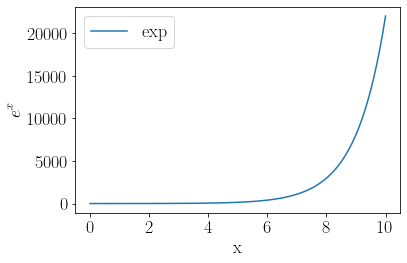

In [50]:
x = np.linspace(start, end, steps)
y = np.exp(x)

fig, ax = plt.subplots(1,1, tight_layout=True)

ax.plot(x,y, label="exp")

ax.set_xlabel("x")
ax.set_ylabel("$e^{x}$")

ax.legend()

fig.savefig("exponential.pdf")

## Multiple axes in one figure
- why do we use the cumbersome axes?
- with the `plt.subplots()` method we can create a grid of axes over which we can iterate